<a href="https://colab.research.google.com/github/Leenasmk3/IT326-DataMining-Project/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download at DataSet
df = pd.read_csv("https://raw.githubusercontent.com/Leenasmk3/IT326-DataMining-Project/main/Dataset/Raw_dataset.csv")


# Look at Data
print("DataSet info:")
display( df.info())

print("\n First 5 row:")
display(df.head())

DataSet info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None


 First 5 row:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#  Five-number summary
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Remove the unwanted columns
exclude_cols = ['PassengerId', 'Survived', 'Pclass']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

five_num = df[numeric_cols].quantile([0, 0.25, 0.5, 0.75, 1.0]).T
five_num.columns = ['min', 'Q1(25%)', 'median(50%)', 'Q3(75%)', 'max']
print("\nFive-number summary:")
display(five_num)


Five-number summary:


,min,Q1(25%),median(50%),Q3(75%),max
Age,0.42,20.1250,28.0000,38.0,80.0000
SibSp,0.00,0.0000,0.0000,1.0,8.0000
Parch,0.00,0.0000,0.0000,0.0,6.0000
Fare,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns


# Remove unwanted columns
exclude_cols = ['PassengerId', 'Survived', 'Pclass']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Threshold for standard deviation method
threshold = 2

# Store results
outlier_summary = []

for col in numeric_cols:
    data = df[col].dropna()
    mean = np.mean(data)
    std_dev = np.std(data)

    # boundaries
    lower = mean - threshold * std_dev
    upper = mean + threshold * std_dev

    # find outliers
    outliers = data[(data < lower) | (data > upper)]

    # save summary
    outlier_summary.append({
        "Column": col,
        "Outlier_Count": len(outliers),
        "Sample_Outliers (Top 10)": outliers.sort_values(ascending=False).head(10).tolist()
    })

# Create summary DataFrame
summary_df = pd.DataFrame(outlier_summary)

print("\n Outliers Summary using Standard Deviation Method:\n")
display(summary_df)


 Outliers Summary using Standard Deviation Method:



,Column,Outlier_Count,Sample_Outliers (Top 10)
0,Age,29,"[80.0, 74.0, 71.0, 71.0, 70.5, 70.0, 70.0, 66...."
1,SibSp,46,"[8, 8, 8, 8, 8, 8, 8, 5, 5, 5]"
2,Parch,95,"[6, 5, 5, 5, 5, 5, 4, 4, 4, 4]"
3,Fare,38,"[512.3292, 512.3292, 512.3292, 263.0, 263.0, 2..."



 Boxplots for numeric variables: 



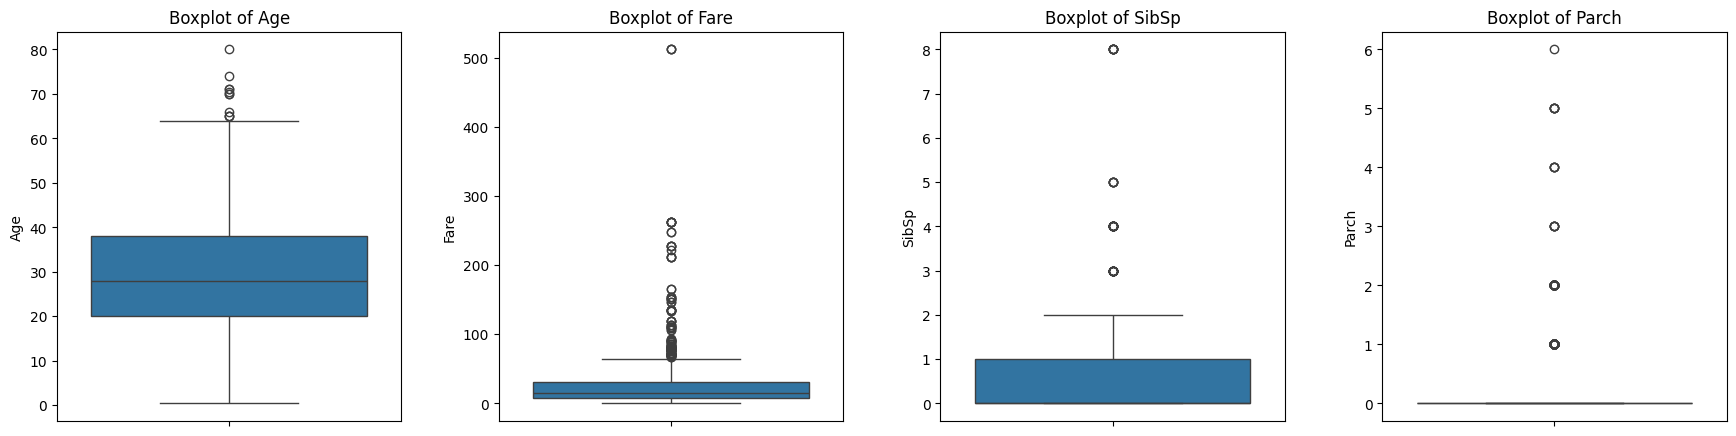


 Boxplots by Survived: 



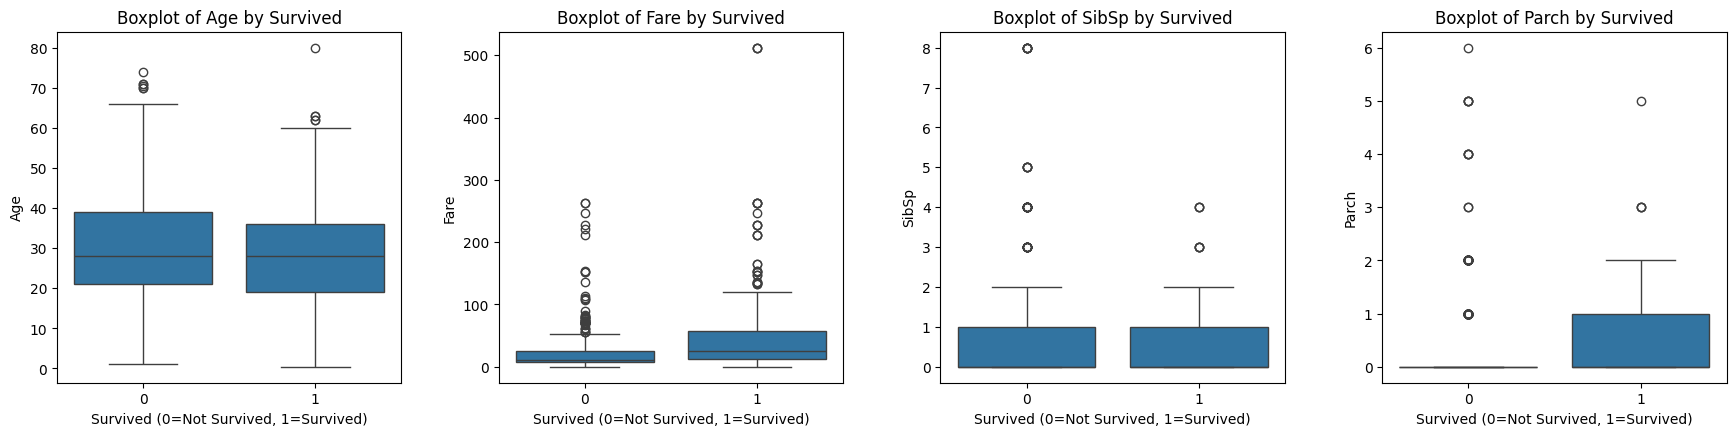

In [ ]:
# Boxplots for numeric variables
print("\n Boxplots for numeric variables: \n")
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

fig, axes = plt.subplots(1, len(numeric_cols), figsize=(18, 5))
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout(pad=3.0)
plt.show()

# Boxplots by Survived (Age, Fare, SibSp, Parch)
print("\n Boxplots by Survived: \n")
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x='Survived', y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Survived')
    axes[i].set_xlabel('Survived (0=Not Survived, 1=Survived)')
    axes[i].set_ylabel(col)

plt.tight_layout(pad=3.0)
plt.show()



 Histograms for numeric attributes: 



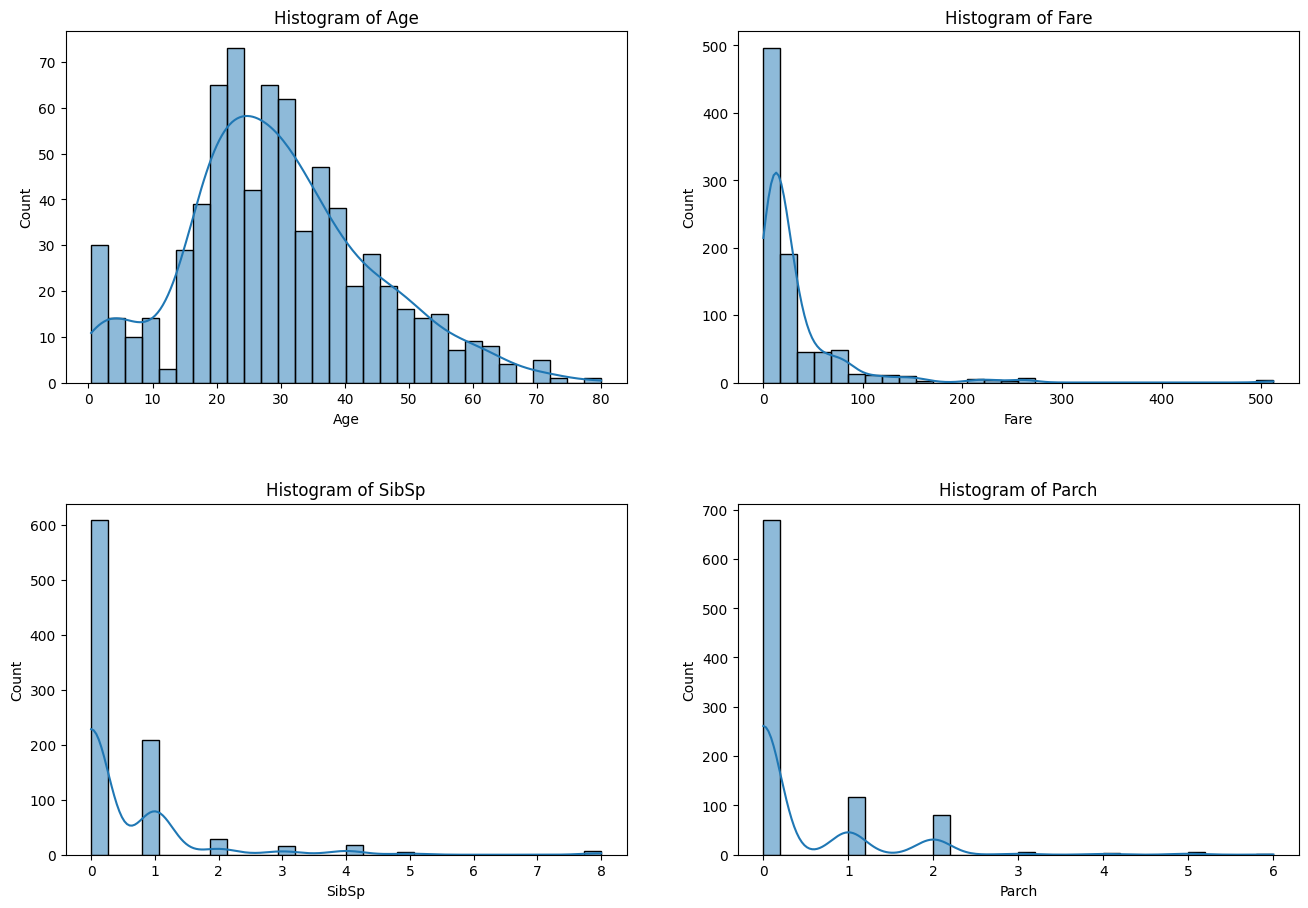


 Scatter plot: 



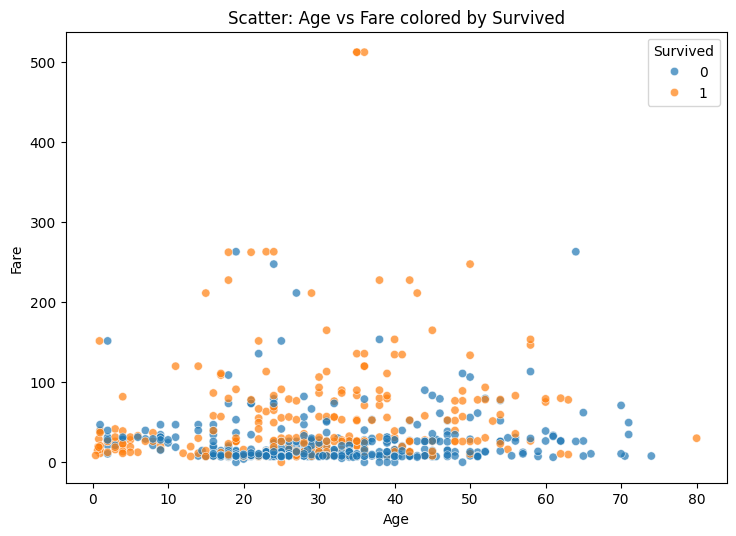


 Bar plots for categorical variables: 



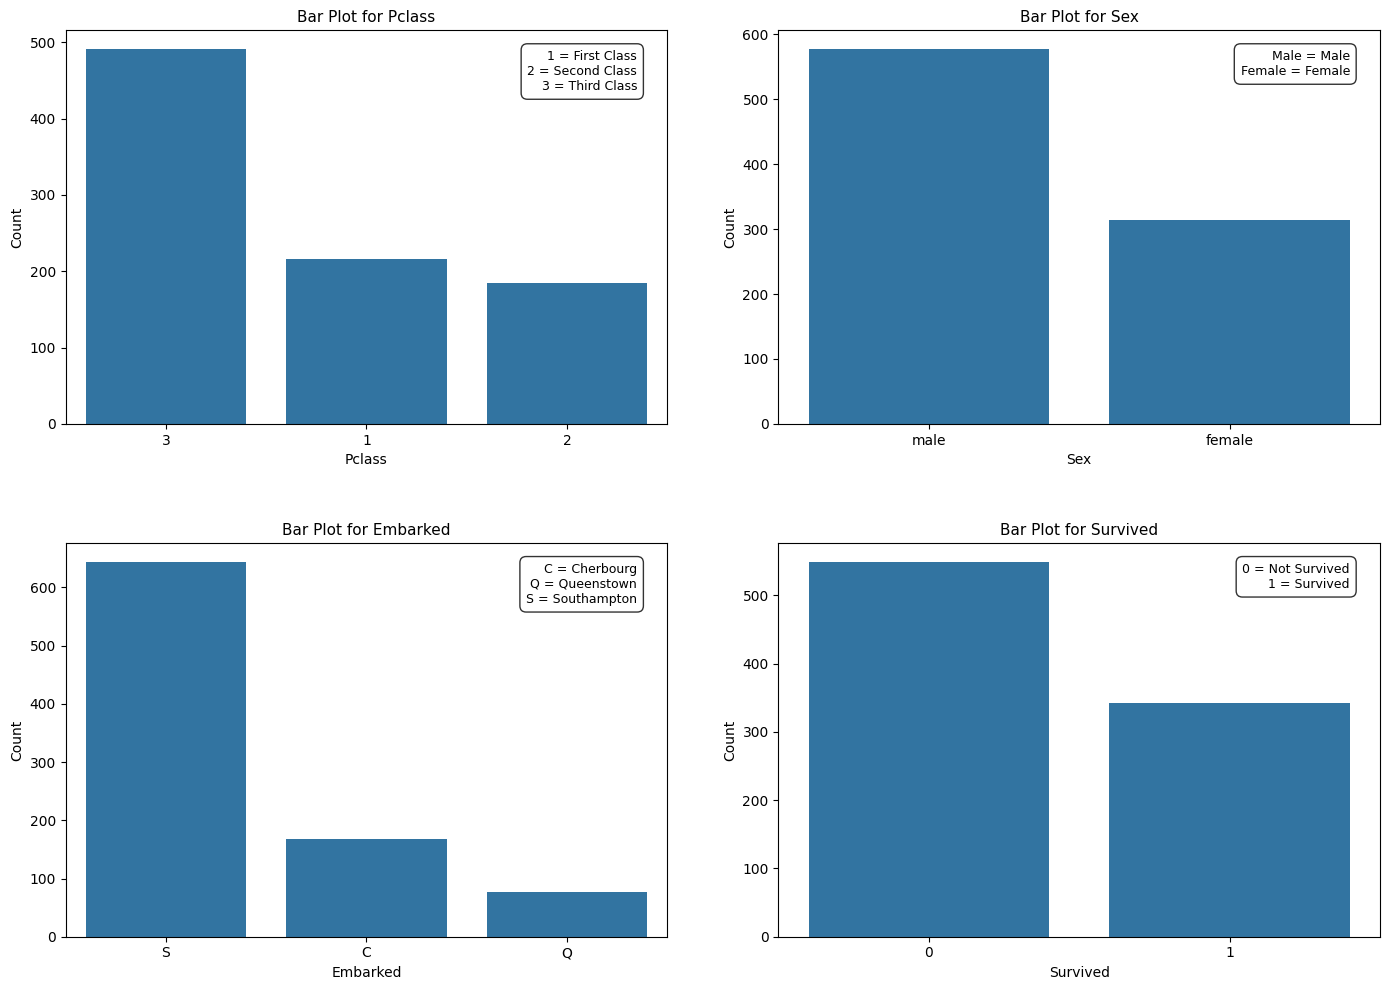

In [ ]:
# Histograms for numeric attributes
print("\n Histograms for numeric attributes: \n")
numeric_cols = ['Age','Fare','SibSp','Parch']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout(pad=4)
plt.show()

# Scatter plot: Age vs Fare
print("\n Scatter plot: \n")
if set(['Age','Fare','Survived']).issubset(df.columns):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', alpha=0.7)
    plt.title('Scatter: Age vs Fare colored by Survived')
    plt.tight_layout(pad=3)
    plt.show()

# Bar plots for categorical variables
print("\n Bar plots for categorical variables: \n")

cat_cols = ['Pclass', 'Sex', 'Embarked', 'Survived']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
value_labels = {
    'Survived': '0 = Not Survived\n1 = Survived',
    'Pclass': '1 = First Class\n2 = Second Class\n3 = Third Class',
    'Sex': 'Male = Male\nFemale = Female',
    'Embarked': 'C = Cherbourg\nQ = Queenstown\nS = Southampton'
}
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Bar Plot for {col}', fontsize=11)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

    #explanation box
    axes[i].text(
        0.95, 0.95,
        value_labels[col],
        transform=axes[i].transAxes,
        fontsize=9,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5')
    )

plt.tight_layout(w_pad=4, h_pad=4)
plt.show()


Missing Values Summary:


,missing_count,missing_%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


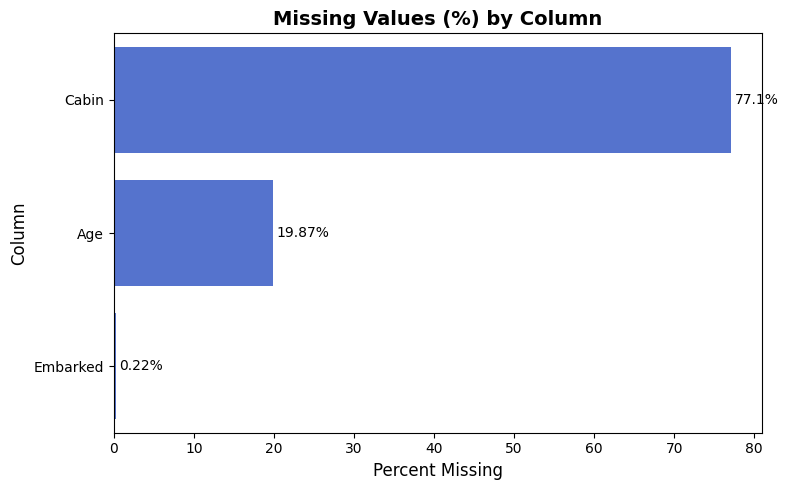

In [ ]:

missing_cnt = df.isnull().sum()
missing_pct = (missing_cnt / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'missing_count': missing_cnt,
    'missing_%': missing_pct
})

missing_df = missing_df[missing_df['missing_count'] > 0].sort_values('missing_%', ascending=False)

print("Missing Values Summary:")
display(missing_df)

plt.figure(figsize=(8, 5))
sns.barplot(x=missing_df['missing_%'], y=missing_df.index, color='royalblue')
plt.title("Missing Values (%) by Column", fontsize=14, weight='bold')
plt.xlabel("Percent Missing", fontsize=12)
plt.ylabel("Column", fontsize=12)

for i, (value, name) in enumerate(zip(missing_df['missing_%'], missing_df.index)):
    plt.text(value + 0.5, i, f"{value}%", va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


he dataset has missing values in the column 'Age' , 'Cabin' and ' Enbarked'
'Cabin have the large amount of missing data, which , might need to be dropped or filled later
```

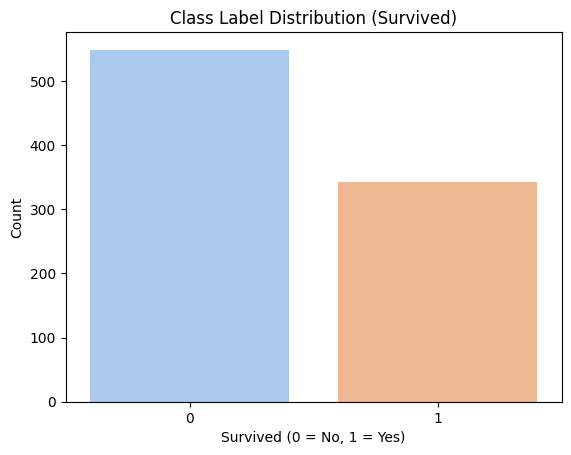

In [ ]:
# plot showing class lable distribution

import warnings
warnings.filterwarnings("ignore")

sns.countplot(data=df, x='Survived', palette='pastel', legend=False)
plt.title("Class Label Distribution (Survived)")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()



the dataset is slightly imbalanced: more passengers did not survive than those who did.
This imbalance should be considered in the modeling phase.

In [ ]:
#copy of the raw data
df_copy = df.copy()

#Handling Missing Values
# Embarked : fill missing values with the most frequent value (mode)
df_copy["Embarked"] = df_copy["Embarked"].fillna(df_copy["Embarked"].mode()[0])

# Age : fill missing values with the median
df_copy["Age"] = df_copy["Age"].fillna(df_copy["Age"].median())

#Cabin: drop the column due to too many missing values (~77%)
df_copy = df_copy.drop(columns=["Cabin"])

In [ ]:
# Variable Transformation: Log Transformation on Fare
# Plot histogram before transformation
plt.figure(figsize=(6,4))
sns.histplot(df_copy["Fare"], bins=30, kde=True)
plt.title("Fare - Before Transformation")
plt.show()
# Apply log transformation (log1p to handle zero values )
df_copy["Fare_log"] = np.log1p(df_copy["Fare"])
# Plot histogram after transformation
plt.figure(figsize=(6,4))
sns.histplot(df_copy["Fare_log"], bins=30, kde=True, color="orange")
plt.title("Fare - After log1p Transformation")
plt.show()

In [ ]:
# Discretization
# Age: convert continuous values into categories
age_bins   = [0, 12, 19, 39, 59, 100]
age_labels = ["Child", "Teen", "YoungAdult", "Adult", "Senior"]
df_copy["Age_bin"] = pd.cut(
    df_copy["Age"], bins=age_bins, labels=age_labels, right=True, include_lowest=True
)
sns.countplot(x="Age_bin", data=df_copy)
plt.title("Distribution of Age after Discretization")
plt.show()